## The Drunken Sailor Problem in 1D and 2D

### Drunken sailors leaving a pub that is near a ditch ... 1D

A random walk is sometimes described with a drunken sailor who takes a step and then forgets which way he was going and then takes another step.  We start our sailors at $x=0$ (the pub). 

After $N$ steps we expect that the distribution of a bunch 
of sailors (all leaving the pub at the same time) and moving in 1 dimension is Gaussian in shape. The basic idea here is that sometimes the sailor will move "forward", and sometimes they will move "backward".  On average, a sailor will take as many forward as backward steps, and thus the average value will be zero.  Sometimes, though, they will take more forward steps, and sometimes they will take more backward steps, and so there will be some variation around the mean of zero.

A normalized Gaussian probability distribution with mean $\mu=0$ and dispersion $\sigma$  is 
$$ p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-x^2/(2 \sigma^2)} $$
Here the dispersion (or standard deviation) $\sigma$ is the the square root of the variance.
The variance of a probability distribution with zero mean is
$$\sigma^2 = \int p(x) x^2 dx $$

If the dispersion of a single step is $\sigma$ then the distribution of sailors after $N$ steps is
well described by a probability distribution
$$ p(x,N) = \frac{1}{\sqrt{2 \pi \sigma_N^2}} e^{-x^2/(2 \sigma_N^2)} $$
with $\sigma_N = \sqrt{N}\sigma$.

Below we illustrate a code that does a 1-dimensional random walk using a sum of Gaussian distributions.  The point is here that we have $n_{part}$ sailors, and each takes $n_{steps}$ steps.  So, we just need to first calculate the final position for one sailor taking $n_{steps}$ steps, and then do that $n_{part}$ times.

The resulting distribution of drunk sailors matches the predicted Gaussian distribution.

One really cool extension of this idea is that there is something called the <b> Central Limit Theorem </b> which states that the sum of a bunch of independent variables should (in most cases)
be well described by a normal (Gaussian) distribution.

See https://en.wikipedia.org/wiki/Central_limit_theorem 

So as long as each step is generated by a well
behaved probability distribution, it does not matter what we use to generate it.  In other words we should
get the same behavior using steps generated from a normal distribution as we would if we had flipped a coin at each step, taking a step of equal length  in either direction.  Here *well behaved* means with finite mean and variance.


In [7]:
# example making a random walk and showing that the distribution after a number of
# steps is a gaussian 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats # has lots of distribution functions in it

from math import erfc   # complimentary error function 

# randomly walk nsteps and return the x value
# starting at x=0
#
# each step has zero mean and a variance of 1
#
# so, sometimes the steps are forward, and sometimes the steps are backwards, and
# the LENGTH of each step is variable, according to a Gaussian with a sigma of 1.

def walkn(nsteps):  # random walk using a normal distribution for step sizes
    r = stats.norm.rvs(size=nsteps)  # normal distribution mean=0 variance=1
    # r is a vector values randomly generated with a normal distribution
    return sum(r)  # the sum of the entire vector!  If we just add up all the steps
                   # we will get the final position!!!

# walk npart numbers of particles (or sailors) nsteps and return a vector of x positions
# the function that gives us a randomly generated position is walkn
def npart_walkn(npart,nsteps):
    xvec = np.zeros(0)
    for i in range(npart):
        x = walkn(nsteps)  # a single random walk value
        xvec = np.append(xvec,x)  # append each random walk to the vector
    return xvec  # we return a vector - each element is the final position of a sailors.

nsteps = 100 # number of steps
npart = 1000 # number of particles (sailors) to let walk around

# fill a vector with npart walkers each walking nsteps
xvec = npart_walkn(npart,nsteps)


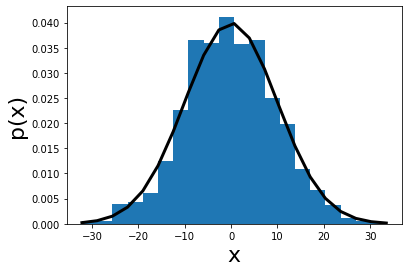

In [8]:
# plot the histogram, i.e., measured distribution of final positions 
#   after n steps of random walking 
n, bins, patches =plt.hist(xvec,bins=20,density=True)
#
# density = True will make it a normalized probability histogram
#
# this retuns as n the number of values counted, bins is the x values of the bins, 
# patches is for plotting the histogram
#
# bins will be the most important thing here - we will use that below
#
plt.xlabel("x",fontsize=22)
plt.ylabel("p(x)",fontsize=22)  # probability!

# a gaussian probability density distribution, this is a function!
mygaus = stats.norm(0.0, np.sqrt(nsteps))  # should scale with sqrt(nsteps)
y = mygaus.pdf(bins)  # evaluate the function at the bin locations
plt.plot(bins,y,"k", lw=3 )  #plot the expected density distribution as a black line

After 100 steps of random walk 1000 particles show a gaussian distribution with width predicted using
the square root of the number of steps (and their sizes).

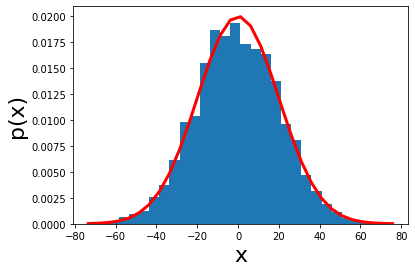

In [9]:
# check that if we increase the number of particles we get the same answer
nsteps = 400 # number of steps
npart = 4000   # number of particles to let walk around
xvec = npart_walkn(npart,nsteps)

# plot the histogram, i.e., measured distribution of final positions after n steps of random walking around
n, bins, patches =plt.hist(xvec,bins=30,density=True)
plt.xlabel("x",fontsize=22)
plt.ylabel("p(x)",fontsize=22)

# a gaussian probability density distribution - is a function!
mygaus = stats.norm(0.0, np.sqrt(nsteps))  # should scale with sqrt(nsteps)
y = mygaus.pdf(bins) # evaluate the probability distribution at the bin values
plt.plot(bins,y,"r", lw=3 )  #plot the expected density distribution as a red line

After 4000 steps of random walk 40000 particles show a gaussian distribution with width predicted using
the square root of the number of steps (and their sizes).
This picture should look even better than the last one as we ran more particles and steps, and that's good.

In [10]:
# notes on the stats package
n=0
stats.norm.rvs(size=n)  # returns a vector n long that has random values from a normal distribution
stats.norm.rvs()  # returns a single random number (generated from a normal distribution)
func = stats.norm.pdf  # a probability density function that is normal!
# you can call this with func(x)
mean=0; std=1
stats.norm(mean, std).rvs()  # uses a normal distribution with mean and standard deviation

-0.0992671735746159

In [11]:
func = stats.norm.pdf


### Random walk with a ditch

If there is a post at $x_p>0$ the fraction of sailors currently past the post after $N$ steps of size chosen with dispersion $\sigma$ is

\begin{align*}
 f(x_p,N) &= \int_{x_p}^\infty \frac{1}{\sqrt{2 \pi \sigma_N^2}} e^{-x^2/(2 \sigma_N^2)} dx \\
 &= \int_{x_p/(\sqrt{2}\sigma_N)}^\infty \frac{1}{\sqrt{\pi}}e^{-z^2} dz\\
 &= \frac{1}{2} {\rm erfc}\left( \frac{x_p}{\sqrt{2}\sigma_N} \right)
\end{align*}
with $\sigma_N = \sqrt{N} \sigma$.

The complimentary error function is defined as
$$ {\rm erfc}(y) \equiv \frac{2}{\pi} \int_y^\infty  e^{-t^2} dt $$

<img src="drunken_sailor.png">

We now place a ditch at a particular $x$ 
location, $x_{ditch}$  which we take to be $>0$.   
If a drunken sailor steps into the ditch then he can't get out and sleeps there until morning.

<ol> 
<li>
We start by computing a probability distribution of remaining sailors that are not in the ditch after a number of steps $N$.
It turns out that the probability distribution is not much different than a Gaussian distribution as long as
$ \sqrt{N}\sigma \ll x_{ditch} $, but as $N$ increases, the distribution becomes lopsided.  We shoudl make sure the distribution is normalized (integrates to 1),
</li>

<li>
We can now calculate, as a function of of numbers of steps $N$, the fraction of sailors left in the ditch. 
</li>
 
We can estimate the fraction of drunk sailors that
have fallen into the ditch  by integrating the tail of the  probability density distribution in the absence of the ditch. 

As above we estimate that the fraction of sailors in the ditch after $N$ steps is described with this function 
$$ f(x_{ditch},N ) \sim \frac{1}{2} {\rm erfc}\left( \frac{x_{ditch}}{\sqrt{2}\sigma_N} \right)$$

The erfc function is available as *math.erfc()*

<li>
As a function of the number of steps $N$, we can compare the numerically measured fraction of sailors in the ditch to
the function $f(x_{ditch}, N )$
 computed with the complimentary error function.

We will see that the analytical estimate is incorrect. In fact, many more sailors wind up in the ditch!
</li>
</ol>

For N=60 and $x_{ditch}=10$, we that find that about twice as many sailors wind up in the ditch as incorrectly
predicted with this formula.

Physicists have exploited this analogy to trap atoms in a potential well using thermal motions.



(array([ 0.4,  0. ,  0.4,  0.4,  0.4,  1.6,  2.4,  2.4,  2.8,  4.4,  5.6,
        12.8,  6.4, 14.8, 19.2, 20.8, 16.8, 33.6, 19.6, 30. , 22.8, 24.8,
        28.4, 21.6, 20.8, 18.4, 15.2, 12.8, 14.4,  6.8,  8. ,  2. ,  3.2,
         1.6,  3.2,  0. ,  0.8,  0. ,  0. ,  0.4]),
 array([0.659 , 0.6615, 0.664 , 0.6665, 0.669 , 0.6715, 0.674 , 0.6765,
        0.679 , 0.6815, 0.684 , 0.6865, 0.689 , 0.6915, 0.694 , 0.6965,
        0.699 , 0.7015, 0.704 , 0.7065, 0.709 , 0.7115, 0.714 , 0.7165,
        0.719 , 0.7215, 0.724 , 0.7265, 0.729 , 0.7315, 0.734 , 0.7365,
        0.739 , 0.7415, 0.744 , 0.7465, 0.749 , 0.7515, 0.754 , 0.7565,
        0.759 ]),
 <a list of 40 Patch objects>)

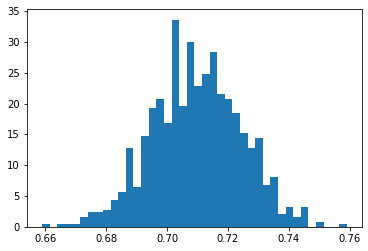

In [12]:
def walk_ditch(xditch,nsteps,sigma):  # random walk using a normal distribution for step sizes
    r = stats.norm.rvs(size=nsteps,scale=sigma)  # normal distribution mean=0 variance=sigma^2
    # r is a vector values randomly generated with a normal distribution
    
    xpos = 0.0
    for i in range(nsteps):
        xpos += r[i]
        if xpos>xditch:
            return False
    return True
    
def npart_walk_ditch(npart,xditch,nsteps,sigma):
    
    survive_sum = 0.0
    xvec = np.zeros(0)
    for i in range(npart):
        survive = walk_ditch(xditch,nsteps,sigma)  # a single random walk result
        if survive:
            survive_sum += 1

    survive_prob = survive_sum/npart
    return survive_prob

nsteps = 100 # number of steps
npart = 1000 # number of particles (sailors) to let walk around

# fill a vector with npart walkers each walking nsteps

sigma = 1.0
xditch = 1.0*np.sqrt(nsteps)*sigma

N_trials = 1000

sprobdist = []

for i in range(N_trials):
    prob = npart_walk_ditch(npart,xditch,nsteps,sigma)
    sprobdist.append(prob)

plt.hist(sprobdist,bins=40,density=True)

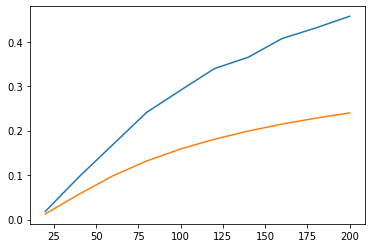

In [13]:
nstepsarray = np.array([20,40,60,80,100,120,140,160,180,200]) # number of steps
npart = 10000 # number of particles (sailors) to let walk around

from math import erfc

# fill a vector with npart walkers each walking nsteps

sigma = 1.0
xditch = 10

sprobdist = []
sprobtheory = []

for nsteps in nstepsarray:
    prob = npart_walk_ditch(npart,xditch,nsteps,sigma)
    sprobdist.append(1-prob)
    
    sigma_N = np.sqrt(nsteps)*sigma
    sprobtheory.append(0.5*erfc(xditch/(np.sqrt(2)*sigma_N)))

plt.plot(nstepsarray,sprobdist)
plt.plot(nstepsarray,sprobtheory)


# Now, let's turn our attention to random walk in 2D

An example of a probability distribution that is *heavy tailed* is the Breit-Wigner distribution - also
called the Lorentz distribution, or the Cauch distribution. It is a real thing, and governs a ton of real
physical processes, most importantly perhaps the width of energy levels in quantum systems (Think Heisenberg
Uncertainty Principle!!!!)

See https://en.wikipedia.org/wiki/Cauchy_distribution

It turns out the Breit-Wigner distribution has an interesting mathematical interpretation. 

Imagine starting at a point in 2D space $(x_0,\gamma)$.  Now, choose an angle randomly between zero and 2$\pi$.  The Breit-Wigner distribution will be the distribution of x-intercepts of lines extending from this point at that angle!


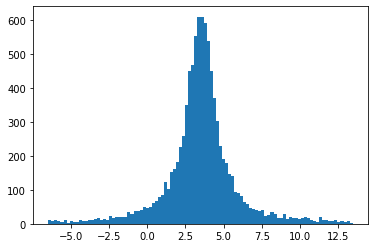

In [42]:
x0 = 3.5
gamma = 1.0
npart = 10000

fbw = []
for i in range(npart):
    angle = stats.uniform.rvs()*2.0*np.pi # choose the angle randomly
    slope = np.sin(angle)/np.cos(angle)
    xint = x0 - gamma/slope
    if (xint<10+x0 and xint>-10+x0):
        fbw.append(xint)

n, bins, patches =plt.hist(fbw,bins=100)

The full width half-max (FWHM = full width half max) can be controlled with the parameter $\gamma$ giving a probability distribution
$$f(x) =  \frac{1}{\pi\gamma} \frac{\gamma^2}{(x-x_0)^2+ \gamma^2} $$

This distribution has a nice property that a sum of random variables drawn from Breit-Wigner distributions is also
Breit-Wigner (but with a different FWHM).  However it has tails that are pathological in the sense that the distribution
has infinite variance and so it is an example of something that violates the Central Limit theorem.

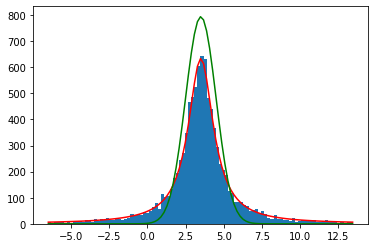

In [41]:
bin_width = bins[1]-bins[0]
fbw_theory = npart*bin_width*(1.0/(np.pi*gamma)*(gamma**2/((bins-x0)**2 + gamma**2)))

n, bins, patches =plt.hist(fbw,bins=100)

# The FWHM occurs between x = x0 - gamma and x= x0 + gamma, i.e. the width is 2*gamma
#
# For a Gaussian, the FWHM = 2.35*sigma

norm_theory = npart*bin_width*(1.0/np.sqrt(2*np.pi*sigma**2)*np.exp(-0.5*(bins-x0)**2/sigma**2))

plt.plot(bins,fbw_theory,'r-')
plt.plot(bins,norm_theory,'g-')

So, as expected, the Breit-Wigner is indeed *heavy tailed*!

But, the question is, what kind of effect does this have in physical simulations?  I mean, would it not mean
slightly wider distributions than Gaussian?

To illustrate the difference we show a 2-dimensional random walk generated with steps
taken from  a Breit-Wigner distribution
and compare it to that generated from a random walk taken with steps generated from a normal distribution.

In [43]:
# example comparing 2Dimensional random walks with normal and Cauchy distribution steps
    
# fill some vectors with random walks using Gaussian and using Cauchy distributions

# for sizes of steps
# 2d random walls, returns 4 vectors x,y for each random walk
# angles for each step are chosen from uniform distribution
# but distances moved in each step are chosen from normal or Cauchy distributions
# nsteps is the number of steps taken for both random walks

def fillvecs(nsteps):
    # Set up the Cauchy vectors - initial position at (0,0)
    xCvec=np.zeros(0); yCvec=np.zeros(0)  # vectors of positions for Cauchy steps
    xC=0.0; yC=0.0;  # initial conditions Cauchy walk
    xCvec = np.append(xCvec,xC); yCvec = np.append(yCvec,yC)
    
    # Set up the Normal vectors - initial position at (0,0)
    xNvec=np.zeros(0); yNvec=np.zeros(0)  # vectors of positions for normal steps
    xN=0.0; yN=0.0   # initial conditions Normal walk
    xNvec = np.append(xNvec,xN); yNvec = np.append(yNvec,yN)
    
    fac = 0.1  # adjust size of steps for Cauchy walk
    
    for i in range(nsteps):
        
        # Choose the random angle for the step
        theta1 = stats.uniform.rvs()*2.0*np.pi  #uniformly distributed angles
        theta2 = stats.uniform.rvs()*2.0*np.pi
        
        # Choose the step size (for this step).
        rC = fac*stats.cauchy.rvs()  #cauchy distn step size
        rN = stats.norm.rvs()   # normal distn step size
        
        # Add the new position to the Cauchy vectors
        xC += rC*np.cos(theta1) # update coordinate positions
        yC += rC*np.sin(theta1)
        xCvec = np.append(xCvec,xC); yCvec = np.append(yCvec,yC)  #Cauchy
        
        # Add the new position to the Normal vectors
        xN += rN*np.cos(theta2)  #update coordinate positions
        yN += rN*np.sin(theta2)
        xNvec = np.append(xNvec,xN); yNvec = np.append(yNvec,yN) #Normal
        
    return xCvec,yCvec,xNvec,yNvec  # return the 4 vectors
        

The routines *stats.cauchy.rvs()* and *stats.norm.rvs()* can return a vector of randomly generated numbers.

15.165750888103101


(-144.41469107194712, 144.41469107194712)

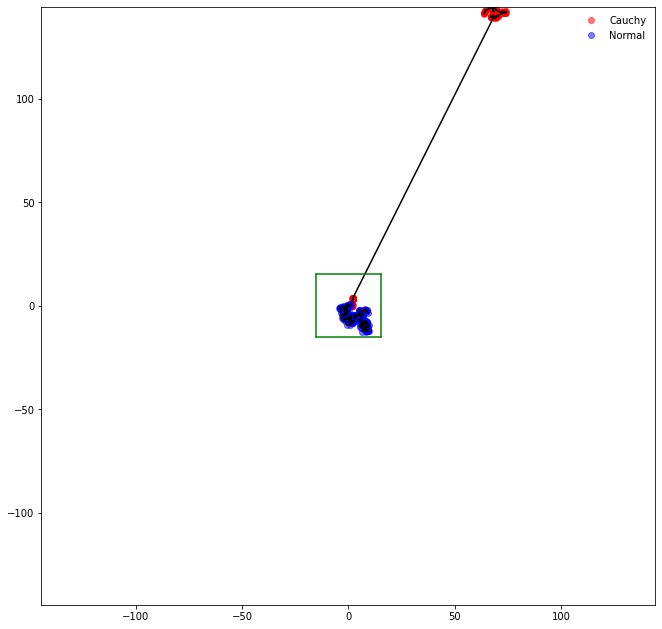

In [83]:
nsteps = 230

xC,yC,xN,yN = fillvecs(nsteps)  # get our random walk trajectories

max = np.array([xC.max(),yC.max(),xN.max(),yN.max()]).max()
min = np.array([xC.min(),yC.min(),xN.min(),yN.min()]).min()
if min<0:
    min = np.abs(min)
if min > max:
    max = min
    
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(11,11))

box_size = np.sqrt(nsteps)
print(box_size)

x_array1 = np.array([-box_size,box_size])
y_array1 = np.array([box_size,box_size])
x_array2 = np.array([-box_size,box_size])
y_array2 = np.array([-box_size,-box_size])
x_array3 = np.array([box_size,box_size])
y_array3 = np.array([-box_size,box_size])
x_array4 = np.array([-box_size,-box_size])
y_array4 = np.array([-box_size,box_size])

# and plot them
axs.plot(xC,yC,'ro',alpha=0.5, label="Cauchy")  
axs.plot(xC,yC,'k-')
axs.plot(xN,yN,'bo',alpha=0.5,label="Normal")
axs.plot(xN,yN,'k-')

axs.plot(x_array1,y_array1,'g-')
axs.plot(x_array2,y_array2,'g-')
axs.plot(x_array3,y_array3,'g-')
axs.plot(x_array4,y_array4,'g-')

plt.legend(loc='best', frameon=False)
axs.set_xlim(-max,max)
axs.set_ylim(-max,max)

We notice that the normal distribution random walk looks very different than the Cauchy one.
The Cauchy one has intermittent clumps and large intermediate steps due to its tail.
The two walks look very different! Here I have reduced the size of the Cauchy steps by a factor of 0.1
so we could get the two walks nicely in the same window!